In [55]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [56]:
import pandas as pd
import scipy
import scipy.io
import numpy as np
from scipy import optimize
import math
from collections import Counter
#import knitro
import matplotlib.pyplot as plt

# set random seed
import random
random.seed(3600021601)

In [57]:
mat3 = scipy.io.loadmat('../inp/100markets3products.mat')  # load mat-file
eta3 = mat3['eta'] # Simulated unobserved error
alphas3 = mat3['alphas'] # Simulated alphas
P_opt3 = mat3['P_opt']
shares3 = mat3['shares']
w3 = mat3['w']
x1_3 = mat3['x1']
xi3 = mat3['xi_all'].flatten("F")
Z3 = mat3['Z']
prices_stacked3 = P_opt3.flatten("F")
shares_stacked3 = shares3.flatten("F")

#Create a df with product characteristics
df3 = pd.DataFrame(x1_3, columns = ['x0','x1','x2'])
df3['price'] = prices_stacked3
df3['share'] = shares_stacked3
df3['eta'] = eta3
df3['w'] = w3
df3['Z'] = Z3


In [58]:
# Now the 5 products data
mat5 = scipy.io.loadmat('../inp/100markets5products.mat')  # load mat5-file
eta5 = mat5['eta'] # Simulated unobserved error
alphas5 = mat5['alphas'] # Simulated alphas
P_opt5 = mat5['P_opt']
shares5 = mat5['shares']
w5 = mat5['w']
x1_5 = mat5['x1']
xi5 = mat5['xi_all'].flatten("F")
Z5 = mat5['Z']
prices_stacked5 = P_opt5.flatten("F")
shares_stacked5 = shares5.flatten("F")

#Create a df with product characteristics
df5 = pd.DataFrame(x1_5, columns = ['x0','x1','x2'])
df5['price'] = prices_stacked5
df5['share'] = shares_stacked5
df5['eta'] = eta5
df5['w'] = w5
df5['Z'] = Z5

## Distribution of prices

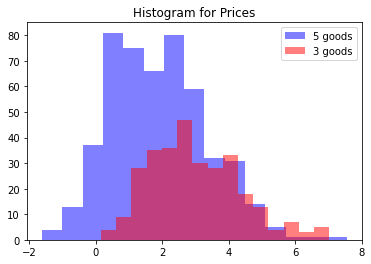

In [59]:
# Compare both histograms
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df5["price"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df3["price"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
ax.set_title('Histogram for Prices')
ax.legend()

## Distribution of profits

In [60]:
df3['mc'] = 2 + df3['w'] + df3['Z'] + df3['eta']
df3['profitPerUnit'] = df3['price'] - df3['mc']
df3['profits'] = df3['profitPerUnit']*df3['share']

df5['mc'] = 2 + df5['w'] + df5['Z'] + df5['eta']
df5['profitPerUnit'] = df5['price'] - df5['mc']
df5['profits'] = df5['profitPerUnit']*df5['share']

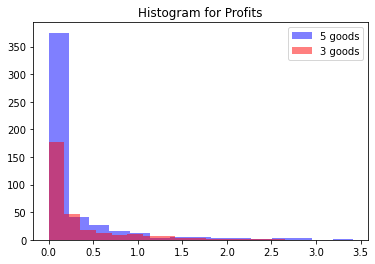

In [61]:
# Compare profits
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df5["profits"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df3["profits"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
ax.set_title('Histogram for Profits')
ax.legend()

## Consumer surplus

In [62]:
tasteShocks3 = np.random.lognormal(0,1,500)
tasteShocks5 = np.random.lognormal(0,1,500)


# Lets start with the 100 markets, 3 products scenario

$U_{jm}= X_{jm,0}\beta_0 + X_{jm,1}\beta_1 + X_{jm,2}\beta_2 - \alpha_i p_{jm} + \xi_{jm} + \epsilon_{ijm} $

In [63]:
mat3 = scipy.io.loadmat('../inp/100markets3products.mat')  # load mat-file
eta3 = mat3['eta'] # Simulated unobserved error
alphas3 = mat3['alphas'] # Simulated alphas
P_opt3 = mat3['P_opt']
shares3 = mat3['shares']
w3 = mat3['w']
x1_3 = mat3['x1']
xi3 = mat3['xi_all']
Z3 = mat3['Z']
prices_stacked3 = P_opt3.flatten("F")
shares_stacked3 = shares3.flatten("F")




In [64]:
utilityMatrix = []
taste_shocks3 = []
for j in range(0,100):
    initialJ = j*3
    finalJ = (j+1)*3
    for i in range(0,500):
        #print(i)
        initialI = i*3 
        finalI = (i+1)*3
        alpha = alphas3[j,i]
        x0 = x1_3[initialJ:finalJ,0]
        x1 = x1_3[initialJ:finalJ,1]
        x2 = x1_3[initialJ:finalJ,2]
        xi = xi3[initialJ:finalJ,0]
        p1 = P_opt3[0,j]
        p2 = P_opt3[1,j]
        p3 = P_opt3[2,j]

        epsilon1 = np.random.lognormal(0,1)
        epsilon2 = np.random.lognormal(0,1)
        epsilon3 = np.random.lognormal(0,1) 
        
        taste_shocks3.append([epsilon1,epsilon2,epsilon3])
        
        
        u0 = 0 
        u1 = 5*x0[0] + x1[0] + x2[0] + xi[0] - alpha*p1 + epsilon1
        u2 = 5*x0[1] + x1[1] + x2[1] + xi[1] - alpha*p2 + epsilon2
        u3 = 5*x0[2] + x1[2] + x2[2] + xi[2] - alpha*p3 + epsilon3
        
        utilities = [u0,u1,u2,u3]
        #prices = [0,p1,p2,p3]
        #max_value = max(utilities)
        #max_index = utilities.index(max_value)
        #cs = utilities[max_index] - prices[max_index]
        
        utilityMatrix.append([u0,u1,u2,u3]) #,max_index,cs


In [65]:
df_utilityMatrix3 = pd.DataFrame(utilityMatrix, columns = ['u0','u1','u2', 'u3']) #,'choice','cs'
df_utilityMatrix3['choice']=df_utilityMatrix3.idxmax(axis=1)
df_utilityMatrix3['utility'] = df_utilityMatrix3.max(axis=1)


array([[<AxesSubplot:title={'center':'utility'}>]], dtype=object)

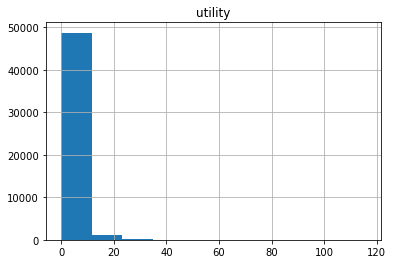

In [66]:
df_utilityMatrix3.hist(column='utility') #weird thing, probably wrong

In [67]:
# Now for the 5 products
utilityMatrix = []
taste_shocks5 = []
for j in range(0,100):
    initialJ = j*5
    finalJ = (j+1)*5
    for i in range(0,500):
        #print(i)
        initialI = i*5 
        finalI = (i+1)*5
        alpha = alphas3[j,i]
        x0 = x1_5[initialJ:finalJ,0]
        x1 = x1_5[initialJ:finalJ,1]
        x2 = x1_5[initialJ:finalJ,2]
        x3 = x1_5[initialJ:finalJ,0]
        x4 = x1_5[initialJ:finalJ,1]
        xi = xi5[initialJ:finalJ]
        p1 = P_opt5[0,j]
        p2 = P_opt5[1,j]
        p3 = P_opt5[2,j]
        p4 = P_opt5[0,j]
        p5 = P_opt5[1,j]

        epsilon1 = np.random.lognormal(0,1)
        epsilon2 = np.random.lognormal(0,1)
        epsilon3 = np.random.lognormal(0,1) 
        epsilon4 = np.random.lognormal(0,1)
        epsilon5 = np.random.lognormal(0,1)
        
        taste_shocks5.append([epsilon1,epsilon2,epsilon3,epsilon4,epsilon5])
        
        
        u0 = 0 
        u1 = 5*x0[0] + x1[0] + x2[0] + xi[0] - alpha*p1 + epsilon1
        u2 = 5*x0[1] + x1[1] + x2[1] + xi[1] - alpha*p2 + epsilon2
        u3 = 5*x0[2] + x1[2] + x2[2] + xi[2] - alpha*p3 + epsilon3
        u4 = 5*x0[1] + x1[3] + x2[3] + xi[3] - alpha*p4 + epsilon4
        u5 = 5*x0[2] + x1[4] + x2[4] + xi[4] - alpha*p5 + epsilon5
        
        utilities = [u0,u1,u2,u3,u4,u5]
        #prices = [0,p1,p2,p3]
        #max_value = max(utilities)
        #max_index = utilities.index(max_value)
        #cs = utilities[max_index] - prices[max_index]
        
        utilityMatrix.append(utilities) #,max_index,cs

In [68]:
df_utilityMatrix5 = pd.DataFrame(utilityMatrix, columns = ['u0','u1','u2', 'u3','u4','u5']) #,'choice','cs'
df_utilityMatrix5['choice']=df_utilityMatrix5.idxmax(axis=1)
df_utilityMatrix5['utility'] = df_utilityMatrix5.max(axis=1)

array([[<AxesSubplot:title={'center':'utility'}>]], dtype=object)

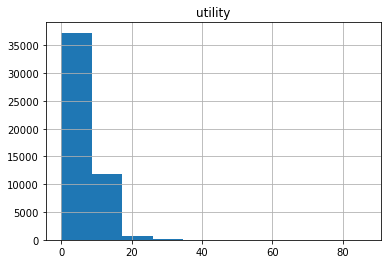

In [69]:
df_utilityMatrix5.hist(column='utility') #weird thing, probably wrong

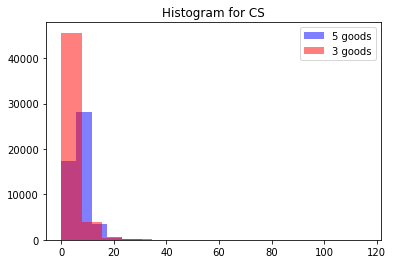

In [70]:
# Compare CS
fig, ax = plt.subplots()

# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(df_utilityMatrix5["utility"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'b', label='5 goods')
ax.hist(df_utilityMatrix3["utility"], bins = 15, ls='dotted', alpha = 0.5, lw=3, color= 'r', label='3 goods')
ax.set_title('Histogram for CS')
ax.legend()

# BLP and Hausman Instruments

## 2.

### 2.a)

$E[\xi_{jm}X_{jm}]$

In [71]:
xi3.shape

(300, 1)

In [72]:
np.mean(np.matmul(np.transpose(xi3),x1_3), axis=0)

array([13.03831111,  6.22257672, 10.65945097])

$E[\xi_{jm}p_{jm}]$

In [73]:
np.matmul(np.transpose(prices_stacked3),xi3)

array([88.48744114])

$E[\xi_{jm}\bar{p}_{jm}]$

In [74]:
hausman_vector = np.zeros(300)
for i in range(0,300):
    hausman_vector[i] = np.mean(np.delete(prices_stacked3, i))

In [75]:
np.mean(hausman_vector*xi3)

0.13153694769686025

$E[\xi_{jm}Z_{jm}]$

In [76]:
np.mean(Z3*xi3)

-0.00814558805654365

### 2.b) 

Only the $E[\xi_{jm}X_{jm}]$ moments seem to be (relatively) valid, since they are relatively small (<0.1). Both price moments give relatively large expected values, so they don't seem valid. 

### 2.c) 

It seems like the only reasonable instruments are the BLP ones, since its moment contition is close to zero. Hausman instruments give a high mean, so it's not OK to use them. 

# 2.2) 

I think that the moments should be:

$E[\xi_{jm}f(Z_{jm})]=0$

$E[\xi_{jm}f(x_{jm})]=0$

$E[\xi_{jm}f(w)]=0$

Note that, since we're using $X_{300\times3}$, $Z_{300\times1}$, and $W_{300\times1}$ as instruments, we'll need to estimate $\eta_{5\times1}$ in the objective function. 

Moreover, we'll be estimating 306 parameters through this procedure:

300 $\delta$s

5 $\eta$s

1 $\sigma_{\alpha}$

I'll use W = I, at least for now

In [77]:
R = 500
tasteShocks = np.random.lognormal(0,1,[100,R])
params = np.ones(306)

In [78]:
tasteShocks.shape

(100, 500)

In [79]:
tasteShocks.shape

(100, 500)

In [80]:
def objFunction(params):
    delta = params[0:300]
    eta = params[300:305]
    sigma = params[305]
    
    value = np.matmul(np.transpose(eta),eta)
    
    return(value)

### Constraints:

We will have 305 constraints as well. One for each $s_{jm}$ (there are 300 of them ), one for each $\eta$ (5 of them) 

In [81]:
tasteShocks[0][1]

1.3803879946772846

## shares constraints V1

def sharesConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    muMatrix = []
    for i in range(0,R):
        muMatrix.append(-tasteShocks[0][i]*prices_stacked3*sigma)

    muMatrix = np.array(muMatrix)
    shares = []

    for j in range(0,300):
        if j%3==0:
            delta1mu = deltaVector[j]+muMatrix[:,j]
            delta2mu = deltaVector[j+1]+muMatrix[:,j+1]
            delta3mu = deltaVector[j+2]+muMatrix[:,j+2]

            maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1+muMatrix[:,j]) #-maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2+muMatrix[:,j+1]) #-maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3+muMatrix[:,j+2]) #-maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 #+ np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp

            shares.append((exp_deltaMu1_divided).sum()/R)
            shares.append((exp_deltaMu2_divided).sum()/R)
            shares.append((exp_deltaMu3_divided).sum()/R)

    sharesDif = shares_stacked3-shares
    return(sharesDif)

sharesConstraints(params).shape        

In [82]:
deltaVector = params[0:300]
etaVector = params[300:305]
sigma = params[305]
muMatrix = np.matmul(P_opt3,tasteShocks)


In [83]:
## Start with shares constraints

def sharesConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    shares = []

    for j in range(0,300):
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            #maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu) #-maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu) #-maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu) #-maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 +1 #+ np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp

            shares.append((exp_deltaMu1_divided).sum()/R)
            shares.append((exp_deltaMu2_divided).sum()/R)
            shares.append((exp_deltaMu3_divided).sum()/R)

    sharesDif = shares_stacked3-shares
    return(sharesDif)

sharesConstraints(params).shape        

(300,)

In [84]:
# Eta constraints
def etaConstraints(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    
    instrumentMatrix = np.concatenate((x1_3,Z3,w3),axis=1)
    endogenousMatrix = np.concatenate((x1_3,prices_stacked3.reshape(-1, 1)), axis=1)

    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    xi_hat = np.matmul(np.ones([300,300])-np.matmul(np.matmul(endogenousMatrix,np.linalg.inv(np.matmul(np.matmul(np.transpose(endogenousMatrix),P_matrix),endogenousMatrix))),np.matmul(np.transpose(endogenousMatrix),P_matrix)),deltaVector)

    moment = np.matmul(np.transpose(instrumentMatrix),xi_hat)/300
    
    constraint = etaVector - moment
    
    return(constraint)

In [85]:
def allConstraints(params):
    shares = sharesConstraints(params)
    etas   = etaConstraints(params)
    return np.concatenate((shares,etas), axis=0)

In [86]:
solution = scipy.optimize.minimize(objFunction, np.ones(306), constraints=({'type': 'eq', 'fun': allConstraints}))


In [87]:
# Just to test that the constraints make sense
solution.success

True

In [92]:
delta_hat = solution.x[:300] # 300*1 vector
eta_hat = solution.x[300:305] # 5*1 vector
sigma_hat = solution.x[-1] # 1*1 vector
delta_hat = np.array([delta_hat])


In [91]:
instrumentMatrix = np.concatenate((x1_3,Z3,w3),axis=1)
endogenousMatrix = np.concatenate((x1_3,prices_stacked3.reshape(-1, 1)), axis=1)

P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))




In [113]:
# Now, from the minimizer I have param = (deltas, etas, sigma) 
# I can then finally back up Alpha and Betas 
XPz = np.matmul(P_matrix, endogenousMatrix)
XPzX = np.matmul(endogenousMatrix.transpose(),XPz)
XPzX_inv = np.linalg.inv(XPzX)

XPzdelta = np.matmul(delta_hat,XPz)

# So, these are my alphas and betas (beta1, beta2, beta3)

alpha_beta = np.matmul(XPzX_inv,XPzdelta.transpose()) # A 4*1 vector with alpha, beta_0, beta_1, beta_2 

## Time to code gradients and fun derivative matrices

In [33]:
def gradient(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    shares = []
    
    gradient = np.zeros(len(params))
    gradient[300:305] = 2*etaVector
    
    return(gradient)
    
    

In [34]:
gradient(params)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
## Start with shares constraints

def jacobianShares(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    jacobianMatrix = np.zeros([len(deltaVector),306])

    for j in range(0,300):   
        if j%3==0:
            market = math.floor(j/3)
            marketShocks = tasteShocks[market,:]
            prices = P_opt3[:,market]
            delta1mu = deltaVector[j]-sigma*marketShocks*prices[0]
            delta2mu = deltaVector[j+1]-sigma*marketShocks*prices[1]
            delta3mu = deltaVector[j+2]-sigma*marketShocks*prices[2]

            #maxDeltaMu = np.max(np.array([delta1mu,delta2mu,delta3mu]))

            exp_deltaMu1 = np.exp(delta1mu) #-maxDeltaMu)
            exp_deltaMu2 = np.exp(delta2mu) #-maxDeltaMu)
            exp_deltaMu3 = np.exp(delta3mu) #-maxDeltaMu)
            sumExp = exp_deltaMu1 + exp_deltaMu2 + exp_deltaMu3 +1 #+ np.exp(-maxDeltaMu)
            exp_deltaMu1_divided = exp_deltaMu1/sumExp
            exp_deltaMu2_divided = exp_deltaMu2/sumExp
            exp_deltaMu3_divided = exp_deltaMu3/sumExp
            sumexp_deltaMu_divided = exp_deltaMu1_divided + exp_deltaMu2_divided + exp_deltaMu3_divided

            one1 = (exp_deltaMu1_divided*(1-exp_deltaMu1_divided)).sum()/R
            one2 = -(exp_deltaMu1_divided*exp_deltaMu2_divided).sum()/R
            one3 = -(exp_deltaMu1_divided*exp_deltaMu3_divided).sum()/R
            oneSigma = (exp_deltaMu1_divided*(prices[1]-sumexp_deltaMu_divided)).sum()/R
            
            two1 = -(exp_deltaMu2_divided*exp_deltaMu1_divided).sum()/R
            two2 = (exp_deltaMu2_divided*(1-exp_deltaMu2_divided)).sum()/R
            two3 = -(exp_deltaMu2_divided*exp_deltaMu3_divided).sum()/R
            twoSigma = (exp_deltaMu2_divided*(prices[1]-sumexp_deltaMu_divided)).sum()/R 
            
            three1 = -(exp_deltaMu3_divided*exp_deltaMu1_divided).sum()/R
            three2 = -(exp_deltaMu3_divided*exp_deltaMu2_divided).sum()/R
            three3 = (exp_deltaMu3_divided*(1-exp_deltaMu3_divided)).sum()/R
            threeSigma = (exp_deltaMu3_divided*(prices[1]-sumexp_deltaMu_divided)).sum()/R
            

            jacobianMatrix[j,j:j+3] = [one1, one2, one3]
            jacobianMatrix[j,300:] = np.append(np.zeros(5),oneSigma)
            

            jacobianMatrix[j+1,j:j+3]= [two1, two2, two3]
            jacobianMatrix[j+1,300:] = np.append(np.zeros(5),twoSigma)
            
            jacobianMatrix[j+2,j:j+3] = [three1,three2,three3]
            jacobianMatrix[j+2,300:] = np.append(np.zeros(5),threeSigma)
            
    return(jacobianMatrix)

In [36]:
def jacobianEtas(params):
    deltaVector = params[0:300]
    etaVector = params[300:305]
    sigma = params[305]
    jacobianMatrix = np.zeros([len(etaVector),306])
    
    instrumentMatrix = np.concatenate((x1_3,Z3,w3),axis=1)
    P_matrix = np.matmul(np.matmul(instrumentMatrix,np.linalg.inv(np.matmul(np.transpose(instrumentMatrix),instrumentMatrix))),np.transpose(instrumentMatrix))
    A = np.ones([300,300])-np.matmul(np.matmul(x1_3,np.linalg.inv(np.matmul(np.matmul(np.transpose(x1_3),P_matrix),x1_3))),np.matmul(np.transpose(x1_3),P_matrix))
    deltasMatrix = np.transpose(np.matmul(A,instrumentMatrix))/300
    jacobianMatrix[:,0:300] = deltasMatrix
    jacobianMatrix[:,300:305] = -np.ones([5,5])
    jacobianMatrix[:,305] = np.zeros(5)
    
    return(jacobianMatrix)
    
    

In [37]:
# Function that gathers all the jacobians
def ultimateJacobian(params):
    jacobianMatrix = np.zeros([305,306])
    
    jacobianMatrix[0:300,:] = jacobianShares(params)
    jacobianMatrix[300:,:] = jacobianEtas(params)
    
    return(jacobianMatrix)


In [39]:
ultimateJacobian(params)

array([[ 0.0277131 , -0.01078453, -0.00954118, ...,  0.        ,
         0.        ,  0.03679477],
       [-0.01078453,  0.14527036, -0.04849823, ...,  0.        ,
         0.        ,  0.27826821],
       [-0.00954118, -0.04849823,  0.11791061, ...,  0.        ,
         0.        ,  0.20588705],
       ...,
       [ 0.05103558,  0.04556432,  0.04597061, ..., -1.        ,
        -1.        ,  0.        ],
       [-0.04206718, -0.04146532, -0.04158178, ..., -1.        ,
        -1.        ,  0.        ],
       [ 0.13993658,  0.14000529,  0.13935646, ..., -1.        ,
        -1.        ,  0.        ]])

## It's now time to define the hessian

## or is it? 


## Go now to the knitro optimization

In [53]:
import autodiff

In [43]:
from knitro import * 



In [ ]:
##################### Now I try a Knitro solution #####################################

# Setup KNITRO solver:
#from knitro import * 

# Setup number of parameters:
#m = 100 # markets
#j = 3 # products
#z = 6 # exclusion restrictions: x_1, x_2, x_3, x_2k + x2_l, x_3k + x_3l
#h = 5 # number of parameters: alpha, beta_1, beta_2, beta_3, sigma_p

#n = (m*j) + z + h # Number of parameters in MPEC: m*j xis, z etas and the h parameters
#k = (m*j) + z # Number of constraints (share equations and moment conditions)

# Setup wrapper for obj function
#def knitro_objective(theta):
#    eta = theta[(m * j):((m * j) + z)]
#    return obj(eta, w = np.identity(len(eta)))


# Setup wrapper for contraints:
#def knitro_constraints(theta):
#    xi = theta[:(m*j)]
#    eta = theta[(m*j):((m*j) + z)]
#    alpha = theta[((m*j) + z):((m*j) + z + 1)]
#    beta = theta[((m*j) + z + 1):((m*j) + z + 4)]
#    sigma = theta[((m*j) + z + 4)]
    
#    moments = moments_constraint(eta, xi, z)

#    shares = shares_constraint(xi, alpha, beta, sigma, prices_flat, r, m, j,
#                               x, nu, shares_n)
                               
#    return np.vstack([moments, shares])

# Setup gradient function with auto-diff:
#knitro_grad = egrad(knitro_objective)

# Setup contraint jacobian function with auto diff:
#knitro_cjacobian = jacobian(knitro_constraints)

# Setup callback functions:

# Objective callback function:
#def callbackEvalFC(kc, cb, evalRequest, evalResult, userParams):
#    if evalRequest.type != KN_RC_EVALFC:
#            print ("*** callbackEvalFC incorrectly called with eval type %d" % evalRequest.type)
#            return -1
    
#    x = evalRequest.x

    # Evaluate objective function:
#    dTmp1 = knitro_objective(x)
#    evalResult.obj = dTmp1 

    # Evaluate contraints:
#    dTmp2 = knitro_constraints(x)
#    for con in range(0,k):
#        evalResult.c[con] = dTmp2[con]

#    return 0


# Constraint callback function:
#def callbackEvalGA(kc, cb, evalRequest, evalResult, userParams):
#    if evalRequest.type != KN_RC_EVALGA:
#       print ("*** callbackEvalGA incorrectly called with eval type %d" % evalRequest.type)
#       return -1

#    x = evalRequest.x 

    # Evaluate gradient of objective function with automatic diff:
#    grad_objective = knitro_grad(x)

#    for param in range(0, n):
#        evalResult.objGrad[param] = grad_objective[param]

    # Evaluate constraint jacobian with automatic diff:
#    cons_jacobian = knitro_cjacobian(x)

    # Evaluate jacobian for every constraint and parameter:
#    jac_position = 0
#    for con in range(0, k):
#        for par in range(0, n):
#            evalResult.jac[jac_position] = cons_jacobian[con, 0, par, 0]

#    return 0


# New point callback
#def callbackNewPoint(kc, x, lambda_, userParams):

    # Get the number of variables in the model
#    num = KN_get_number_vars (kc)

#    print (">> New point computed by Knitro: (", ",".join("%20.12e" % xi for xi in x), ")")

    # Query information about the current problem.
#    dFeasError = KN_get_abs_feas_error (kc)
#    print ("Number FC evals=%d, Current feasError=%e" % (KN_get_number_FC_evals (kc), dFeasError))
    
    # Demonstrate user-defined termination
    # (Uncomment to activate)
#    if KN_get_obj_value (kc) > 0.2 and dFeasError <= 1.0e-4:
#        return KN_RC_USER_TERMINATION
    
#    return 0


# Start KNITRO solver instance:
#kc = KN_new ()

# Set number of parameters and bounds:
#KN_add_vars(kc, n)
#KN_set_var_lobnds(kc, -KN_INFINITY * np.ones(n))
#KN_set_var_upbnds(kc, KN_INFINITY * np.ones(n))

# Set number of constraints and bounds:
#KN_add_cons(kc, k)
#KN_set_con_lobnds(kc, np.zeros(k))
#KN_set_con_upbnds(kc, np.zeros(k))

# Setup indices for constraints, gradient and jacobian structures:

# Constraint indices:
#cIndices = np.arange(k)

# Index structure of gradient of objective:
#objGradIndexVarsCB = np.arange(n)

# Index structure of constraints Jacobian:
#jacIndexConsCB = np.arange(k)
#jacIndexConsCB = np.tile(jacIndexConsCB, n)

#jacIndexVarsCB = np.arange(n)
#jacIndexVarsCB = np.tile(jacIndexVarsCB, k)

# Set the minimizer:
#KN_set_obj_goal(kc, KN_OBJGOAL_MINIMIZE)

# Register new point callback:
#KN_set_newpt_callback(kc, callbackNewPoint)

# Register objective function callback:
#cb = KN_add_eval_callback(kc, True, cIndices, callbackEvalFC)

# Register gradient and hessian function callback:
#KN_set_cb_grad(kc, cb, 
#               objGradIndexVars = objGradIndexVarsCB,
#               jacIndexCons=jacIndexConsCB,
#               jacIndexVars=jacIndexVarsCB,
#               gradCallback=callbackEvalGA)

# Solve BLP:
#nStatus = KN_solve(kc)

# Store results:
#nStatus, objSol, x, lambda_ = KN_get_solution(kc)

# End instance:
#KN_free(kc)


In [100]:
import jax


In [48]:
# Setup number of parameters:
m = 100 # markets
j = 3 # products
z = 6 # exclusion restrictions: x_1, x_2, x_3, x_2k + x2_l, x_3k + x_3l
h = 5 # number of parameters: alpha, beta_1, beta_2, beta_3, sigma_p
n = (m*j) + z + h # Number of parameters in MPEC: m*j xis, z etas and the h parameters
k = (m*j) + z # Number of constraints (share equations and moment conditions)


from knitro import *

# Create a new Knitro solver instance.
try:
    kc = KN_new ()
except:
    print ("Failed to find a valid license.")
    quit ()
# Add variables:
xIndices = KN_add_vars (kc, n)
# Set number of constraints and bounds:
KN_add_cons(kc, k)
KN_set_con_lobnds(kc,np.arange(0,k),np.zeros(k))
KN_set_con_upbnds(kc,np.arange(0,k),np.zeros(k))

# Index structure of gradient of objective:
objGradIndexVarsCB = np.arange(n)

# Index structure of constraints Jacobian:
jacIndexConsCB = np.arange(k)
jacIndexConsCB = np.tile(jacIndexConsCB, n)
jacIndexVarsCB = np.arange(n)
jacIndexVarsCB = np.tile(jacIndexVarsCB, k)



IndexError: index 310 is out of bounds for axis 0 with size 306

In [138]:
jacIndexCons = [0, 0, 0]
jacIndexVars = [0, 1, 2]
jacCoefs = [1.0, 1.0, 1.0]
# Second constraint
jacIndexCons += [1, 1, 1]
jacIndexVars += [0, 1, 3]
jacCoefs += [2.0, 0.5, 1.0]

In [139]:
jacIndexCons

[0, 0, 0, 1, 1, 1]

In [108]:
##################### Now I try a Knitro solution #####################################

# Setup KNITRO solver:
from knitro import * 

# Setup number of parameters:
m = 100 # markets
j = 3 # products
z = 6 # exclusion restrictions: x_1, x_2, x_3, x_2k + x2_l, x_3k + x_3l
h = 5 # number of parameters: alpha, beta_1, beta_2, beta_3, sigma_p

n = (m*j) + z + h # Number of parameters in MPEC: m*j xis, z etas and the h parameters
k = (m*j) + z # Number of constraints (share equations and moment conditions)

# Setup wrapper for obj function
def knitro_objective(theta):
    eta = theta[(m * j):((m * j) + z)]
    return object(eta, w = np.identity(len(eta)))


# Setup wrapper for constraints:
def knitro_constraints(theta):
    xi = theta[:(m*j)]
    eta = theta[(m*j):((m*j) + z)]
    alpha = theta[((m*j) + z):((m*j) + z + 1)]
    beta = theta[((m*j) + z + 1):((m*j) + z + 4)]
    sigma = theta[((m*j) + z + 4)]
    
    moments = etaConstraints(eta, xi, z)

    shares = sharesConstraints(xi, alpha, beta, sigma, prices_flat, r, m, j,
                               x, nu, shares_n)
                               
    return np.vstack([moments, shares])

# Setup gradient function with auto-diff:
knitro_grad = jax.grad(knitro_objective)

# Setup contraint jacobian function with auto diff:
knitro_cjacobian = jax.jacfwd(knitro_constraints)

# Setup callback functions:

# Objective callback function:
def callbackEvalFC(kc, cb, evalRequest, evalResult, userParams):
    if evalRequest.type != KN_RC_EVALFC:
            print ("*** callbackEvalFC incorrectly called with eval type %d" % evalRequest.type)
            return -1
    
    x = evalRequest.x

    # Evaluate objective function:
    dTmp1 = knitro_objective(x)
    evalResult.obj = dTmp1 

    # Evaluate contraints:
    dTmp2 = knitro_constraints(x)
    for con in range(0,k):
        evalResult.c[con] = dTmp2[con]

    return 0


# Constraint callback function:
def callbackEvalGA(kc, cb, evalRequest, evalResult, userParams):
    if evalRequest.type != KN_RC_EVALGA:
       print ("*** callbackEvalGA incorrectly called with eval type %d" % evalRequest.type)
       return -1

    x = evalRequest.x 

    # Evaluate gradient of objective function with automatic diff:
    grad_objective = knitro_grad(x)

    for param in range(0, n):
        evalResult.objGrad[param] = grad_objective[param]

    # Evaluate constraint jacobian with automatic diff:
    cons_jacobian = knitro_cjacobian(x)

    # Evaluate jacobian for every constraint and parameter:
    jac_position = 0
    for con in range(0, k):
        for par in range(0, n):
            evalResult.jac[jac_position] = cons_jacobian[con, 0, par, 0]

    return 0


# New point callback
def callbackNewPoint(kc, x, lambda_, userParams):

    # Get the number of variables in the model
    num = KN_get_number_vars (kc)

    print (">> New point computed by Knitro: (", ",".join("%20.12e" % xi for xi in x), ")")

    # Query information about the current problem.
    dFeasError = KN_get_abs_feas_error (kc)
    print ("Number FC evals=%d, Current feasError=%e" % (KN_get_number_FC_evals (kc), dFeasError))
    
    # Demonstrate user-defined termination
    # (Uncomment to activate)
    if KN_get_obj_value (kc) > 0.2 and dFeasError <= 1.0e-4:
        return KN_RC_USER_TERMINATION
    
    return 0


# Start KNITRO solver instance:
kc = KN_new ()

# Set number of parameters and bounds:
KN_add_vars(kc, n)
KN_set_var_lobnds(kc, np.arange(n), -KN_INFINITY * np.ones(n))
KN_set_var_upbnds(kc, np.arange(n),KN_INFINITY * np.ones(n))

# Set number of constraints and bounds:
KN_add_cons(kc, k)
KN_set_con_lobnds(kc,np.arange(0,k),np.zeros(k))
KN_set_con_upbnds(kc,np.arange(0,k),np.zeros(k))

# Setup indices for constraints, gradient and jacobian structures:

# Constraint indices:
cIndices = np.arange(k)

# Index structure of gradient of objective:
objGradIndexVarsCB = np.arange(n)

# Index structure of constraints Jacobian:
jacIndexConsCB = np.arange(k)
jacIndexConsCB = np.tile(jacIndexConsCB, n)

jacIndexVarsCB = np.arange(n)
jacIndexVarsCB = np.tile(jacIndexVarsCB, k)

# Set the minimizer:
KN_set_obj_goal(kc, KN_OBJGOAL_MINIMIZE)

# Register new point callback:
KN_set_newpt_callback(kc, callbackNewPoint)

# Register objective function callback:
cb = KN_add_eval_callback(kc, True, cIndices, callbackEvalFC)

# Register gradient and hessian function callback:
KN_set_cb_grad(kc, cb, 
               objGradIndexVars = objGradIndexVarsCB,
               jacIndexCons=jacIndexConsCB,
               jacIndexVars=jacIndexVarsCB,
               gradCallback=callbackEvalGA)

# Solve BLP:
nStatus = KN_solve(kc)

# Store results:
nStatus, objSol, x, lambda_ = KN_get_solution(kc)

# End instance:
KN_free(kc)

object() takes no arguments
           Academic License
       (NOT FOR COMMERCIAL USE)
         Artelys Knitro 12.4.0

No start point provided -- Knitro computing one.


ERROR: User routine for func_callback returned -500.
       Could not evaluate objective or constraints at the current point.
object() takes no arguments
ERROR: User routine for grad_callback returned -500.
       Could not evaluate first derivatives at the current point.
         No presolve will be applied.
object() takes no arguments
ERROR: User routine for func_callback returned -500.
       Could not evaluate objective or constraints at the current point.
par_concurrent_evals:    0
presolve:                0
object() takes no arguments
ERROR: User routine for func_callback returned -500.
       Could not evaluate objective or constraints at the current point.

EXIT: Callback function error.




In [ ]:
# Index structure of constraints Jacobian:
#jacIndexConsCB = np.arange(k)
#jacIndexConsCB = np.tile(jacIndexConsCB, n)

#jacIndexVarsCB = np.arange(n)
#jacIndexVarsCB = np.tile(jacIndexVarsCB, k)

In [135]:
jacIndexConsCB = np.arange(k)
np.tile(jacIndexConsCB, n).shape

(95166,)

In [101]:
from knitro import *

# Create a new Knitro solver instance.
try:
    kc = KN_new ()
except:
    print ("Failed to find a valid license.")
    quit ()

# Illustrate how to override default options by reading from
# the knitro.opt file.
KN_load_param_file (kc, "knitro.opt")

# Initialize Knitro with the problem definition.

# Add the variables and set their bounds.
# Note: unset bounds assumed to be infinite.
xIndices = KN_add_vars (kc, 4)
for x in xIndices:
    KN_set_var_lobnds (kc, x, 0.0)

# Add the constraints and set the rhs and coefficients.
KN_add_cons(kc, 2)
KN_set_con_eqbnds (kc, cEqBnds = [5, 8])

# Add Jacobian structure and coefficients.
# First constraint
jacIndexCons = [0, 0, 0]
jacIndexVars = [0, 1, 2]
jacCoefs = [1.0, 1.0, 1.0]
# Second constraint
jacIndexCons += [1, 1, 1]
jacIndexVars += [0, 1, 3]
jacCoefs += [2.0, 0.5, 1.0]
KN_add_con_linear_struct (kc, jacIndexCons, jacIndexVars, jacCoefs)

# Set minimize or maximize (if not set, assumed minimize).
KN_set_obj_goal (kc, KN_OBJGOAL_MINIMIZE)

# Set the coefficients for the objective.
objIndices = [0, 1]
objCoefs = [-4.0, -2.0]
KN_add_obj_linear_struct (kc, objIndices, objCoefs)

# Solve the problem.
# Return status codes are defined in "knitro.py" and described in the Knitro manual.
nStatus = KN_solve (kc)
print ("Knitro converged with final status = %d" % nStatus)

# An example of obtaining solution information.
nStatus, objSol, x, lambda_ =  KN_get_solution (kc)
print ("  optimal objective value  = %e" % objSol)
print ("  optimal primal values x  = (%e, %e, %e, %e)" % (x[0], x[1], x[2], x[3]))
print ("  feasibility violation    = %e" % KN_get_abs_feas_error (kc))
print ("  KKT optimality violation = %e" % KN_get_abs_opt_error (kc))

# Delete the Knitro solver instance.
KN_free (kc)

ERROR: Knitro could not open file 'knitro.opt' for input.


RuntimeError: Knitro-Python error: Return code for C function KN_load_param_file() is -505